In [89]:
import pyreadr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta
import random

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV   
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from utils import *

pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Cargamos datos, borramos duplicados y nulos

In [90]:
CPS_Getafe = pyreadr.read_r('/home/inaki.campo/Brain_Clasificador/CPS_Getafe.rds')[None]
CPS_Leganes = pyreadr.read_r('/home/inaki.campo/Brain_Clasificador/CPS_Leganes.rds')[None]
Fortia = pyreadr.read_r('/home/inaki.campo/Brain_Clasificador/Fortia.rds')[None]
Hormiembro = pyreadr.read_r('/home/inaki.campo/Brain_Clasificador/Hormiembro.rds')[None]

hospital_1 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Hospital 1.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
hospital_2 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Hospital 2.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
hospital_3 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Hospital 3.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])

hotel_1 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Hotel.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])

industria_1 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Industrial 1.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
industria_2 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Industria 2.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
industria_3 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Industrial 3.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
industria_4 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Industria 4.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float64}, parse_dates=[0])

#industria_agrupados_1 = pd.read_csv("/home/inaki.campo/Brain/Perfiles industriales agrupados.csv", sep=";")
#industria_agrupados_2 = pd.read_csv("/home/inaki.campo/Brain/Perfiles industriales agrupados 2.csv", sep=";")

supermercado_1 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Supermercado.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
supermercado_2 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Supermercado 1.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])

almacen_industrial = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Almacen industrial.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])

industria_coninua = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Industria continua.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
industria_farma = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Industria Farmaceutica.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])

oficina_1 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Oficina 1.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
oficina_2 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Oficina 2.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
oficina_3 = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Oficina 3.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])

# POR AGRUPAR
industria_plastica  = pd.read_csv("/home/inaki.campo/Brain_Clasificador/Industria Plastica.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])
industria_alimentacion =  pd.read_csv("/home/inaki.campo/Brain_Clasificador/Industria-Alimentacion.csv", sep=";", names=['Fecha','Consumo'], skiprows=1, dtype={'Consumo': np.float32}, parse_dates=[0])


"""
hospital_1 
hospital_2 
hospital_3    

hotel_1   

industria_1 
industria_2 
industria_3 
industria_4    

supermercado_1 
supermercado_2    

almacen_industrial  

industria_coninua 
industria_farma     

oficina_1 
oficina_2 
oficina_3    

industria_plastica 
industria_alimentacion
"""

/home/inaki.campo/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in multiply
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
/home/inaki.campo/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in multiply
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


'\nhospital_1 \nhospital_2 \nhospital_3    \n\nhotel_1   \n\nindustria_1 \nindustria_2 \nindustria_3 \nindustria_4    \n\nsupermercado_1 \nsupermercado_2    \n\nalmacen_industrial  \n\nindustria_coninua \nindustria_farma     \n\noficina_1 \noficina_2 \noficina_3    \n\nindustria_plastica \nindustria_alimentacion\n'

In [91]:
oficina_1.head()

,Fecha,Consumo
0,2021-01-01 00:00:00,34.300
1,2021-01-01 01:00:00,38.200
2,2021-01-01 02:00:00,34.200
3,2021-01-01 03:00:00,38.100
4,2021-01-01 04:00:00,34.200


In [92]:
print(CPS_Getafe.isnull().values.any())
print(CPS_Leganes.isnull().values.any())
print(Fortia.isnull().values.any())
print(Hormiembro.isnull().values.any())
# Los demas datos no tienen

True
False
True
False


In [93]:
CPS_Getafe = drop_nan_and_nat(CPS_Getafe)
Fortia = drop_nan_and_nat(Fortia)

print(CPS_Getafe.isnull().values.any())
print(Fortia.isnull().values.any())

False
False


In [94]:
# Ordenamos por fecha
CPS_Getafe = CPS_Getafe.drop_duplicates().sort_values('Fecha')
CPS_Leganes = CPS_Leganes.drop_duplicates().sort_values('Fecha')
Fortia = Fortia.drop_duplicates().sort_values('Fecha')
Hormiembro = Hormiembro.drop_duplicates().sort_values('Fecha')

hospital_1 = hospital_1.drop_duplicates().sort_values('Fecha') 
hospital_2 = hospital_2.drop_duplicates().sort_values('Fecha') 
hospital_3 = hospital_3.drop_duplicates().sort_values('Fecha')    

hotel_1 = hotel_1.drop_duplicates().sort_values('Fecha')

industria_1 = industria_1.drop_duplicates().sort_values('Fecha') 
industria_2 = industria_2.drop_duplicates().sort_values('Fecha') 
industria_3 = industria_3.drop_duplicates().sort_values('Fecha') 
industria_4 = industria_4.drop_duplicates().sort_values('Fecha') 

#industria_agrupados_1.drop_duplicates().sort_values('FECHA') 
#industria_agrupados_2.drop_duplicates().sort_values('FECHA')    

supermercado_1 = supermercado_1.drop_duplicates().sort_values('Fecha') 
supermercado_2 = supermercado_2.drop_duplicates().sort_values('Fecha')    

almacen_industrial = almacen_industrial.drop_duplicates().sort_values('Fecha')  

industria_coninua = industria_coninua.drop_duplicates().sort_values('Fecha') 
industria_farma = industria_farma.drop_duplicates().sort_values('Fecha')     

oficina_1 = oficina_1.drop_duplicates().sort_values('Fecha') 
oficina_2 = oficina_2.drop_duplicates().sort_values('Fecha') 
oficina_3 = oficina_3.drop_duplicates().sort_values('Fecha')    

industria_plastica = industria_plastica.drop_duplicates().sort_values('Fecha') 
industria_alimentacion = industria_alimentacion.drop_duplicates().sort_values('Fecha')

In [95]:
# Representsacion cíclica de la hora            -              http://blog.davidkaleko.com/feature-engineering-cyclical-features.html
CPS_Getafe = add_hora_representacion_ciclica(CPS_Getafe)
CPS_Leganes = add_hora_representacion_ciclica(CPS_Leganes)
Fortia = add_hora_representacion_ciclica(Fortia)
Hormiembro = add_hora_representacion_ciclica(Hormiembro)

hospital_1 = add_hora_representacion_ciclica(hospital_1)
hospital_2 = add_hora_representacion_ciclica(hospital_2)
hospital_3 = add_hora_representacion_ciclica(hospital_3)   

hotel_1 = add_hora_representacion_ciclica(hotel_1)  

industria_1 = add_hora_representacion_ciclica(industria_1)
industria_2 = add_hora_representacion_ciclica(industria_2)
industria_3 = add_hora_representacion_ciclica(industria_3)
industria_4 = add_hora_representacion_ciclica(industria_4)    

supermercado_1 = add_hora_representacion_ciclica(supermercado_1)
supermercado_2 = add_hora_representacion_ciclica(supermercado_2)   

almacen_industrial = add_hora_representacion_ciclica(almacen_industrial) 

industria_coninua = add_hora_representacion_ciclica(industria_coninua)
industria_farma = add_hora_representacion_ciclica(industria_farma)    

oficina_1 = add_hora_representacion_ciclica(oficina_1)
oficina_2 = add_hora_representacion_ciclica(oficina_2)
oficina_3 = add_hora_representacion_ciclica(oficina_3)   

industria_plastica = add_hora_representacion_ciclica(industria_plastica)
industria_alimentacion = add_hora_representacion_ciclica(industria_alimentacion)

# Representacion ciclica del mes
CPS_Getafe = add_mes_representacion_ciclica(CPS_Getafe)
CPS_Leganes = add_mes_representacion_ciclica(CPS_Leganes)
Fortia = add_mes_representacion_ciclica(Fortia)
Hormiembro = add_mes_representacion_ciclica(Hormiembro)

hospital_1 = add_mes_representacion_ciclica(hospital_1)
hospital_2 = add_mes_representacion_ciclica(hospital_2)
hospital_3 = add_mes_representacion_ciclica(hospital_3)   

hotel_1 = add_mes_representacion_ciclica(hotel_1)  

industria_1 = add_mes_representacion_ciclica(industria_1)
industria_2 = add_mes_representacion_ciclica(industria_2)
industria_3 = add_mes_representacion_ciclica(industria_3)
industria_4 = add_mes_representacion_ciclica(industria_4) 

supermercado_1 = add_mes_representacion_ciclica(supermercado_1)
supermercado_2 = add_mes_representacion_ciclica(supermercado_2)   

almacen_industrial = add_mes_representacion_ciclica(almacen_industrial) 

industria_coninua = add_mes_representacion_ciclica(industria_coninua)
industria_farma = add_mes_representacion_ciclica(industria_farma)    

oficina_1 = add_mes_representacion_ciclica(oficina_1)
oficina_2 = add_mes_representacion_ciclica(oficina_2)
oficina_3 = add_mes_representacion_ciclica(oficina_3)   

industria_plastica = add_mes_representacion_ciclica(industria_plastica)
industria_alimentacion= add_mes_representacion_ciclica(industria_alimentacion)

In [96]:
industria_alimentacion.head()

,Fecha,Consumo,hora_sin,hora_cos,mes_sin,mes_cos
0,2021-01-01 00:00:00,125.000,0.000,1.000,0.500,0.866
1,2021-01-01 01:00:00,155.000,0.259,0.966,0.500,0.866
2,2021-01-01 02:00:00,125.000,0.500,0.866,0.500,0.866
3,2021-01-01 03:00:00,155.000,0.707,0.707,0.500,0.866
4,2021-01-01 04:00:00,125.000,0.866,0.500,0.500,0.866


### Visualizamos la distribucion del numero de medidas por cada dia

In [97]:
print("Medidas de Fortia")
medidas = medidas_por_dia(Fortia)
mostrar_medidas_por_dia(medidas)

print("Medidas de Hormiembro")
medidas = medidas_por_dia(Hormiembro)
mostrar_medidas_por_dia(medidas)

print("Medidas de CPS_Getafe")
medidas = medidas_por_dia(CPS_Getafe)
mostrar_medidas_por_dia(medidas)

print("Medidas de CPS_Leganes")
medidas = medidas_por_dia(CPS_Leganes)
mostrar_medidas_por_dia(medidas)

Medidas de Fortia
[(1, 1), (23, 6), (24, 1698)]
dias con medidas:  1705
Medidas de Hormiembro
[(23, 2), (24, 727), (25, 1)]
dias con medidas:  730
Medidas de CPS_Getafe
[(2, 1), (3, 3), (4, 18), (5, 46), (6, 11), (7, 2), (8, 1), (9, 1), (16, 1), (19, 1), (23, 1), (24, 23)]
dias con medidas:  109
Medidas de CPS_Leganes
[(1, 1), (12, 1), (15, 1), (23, 2), (24, 715), (25, 1)]
dias con medidas:  721


### Se filtran los dias que tienen 24 mediciones

In [98]:
dias_ok = dias_N_medidas(CPS_Getafe, 24)
Filtered_CPS_Getafe = CPS_Getafe[CPS_Getafe['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]

dias_ok = dias_N_medidas(CPS_Leganes, 24)
Filtered_CPS_Leganes = CPS_Leganes[CPS_Leganes['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]

dias_ok = dias_N_medidas(Fortia, 24)
Filtered_Fortia = Fortia[Fortia['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]

dias_ok = dias_N_medidas(Hormiembro, 24)
Filtered_Hormiembro = Hormiembro[Hormiembro['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]


dias_ok = dias_N_medidas(hospital_1, 24)
Filtered_hospital_1 = hospital_1[hospital_1['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(hospital_2 , 24)
Filtered_hospital_2 = hospital_2[hospital_2['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(hospital_3, 24)
Filtered_hospital_3 = hospital_3[hospital_3['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]   

dias_ok = dias_N_medidas( hotel_1, 24)
Filtered_hotel_1 = hotel_1[hotel_1['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]  

dias_ok = dias_N_medidas( industria_1, 24)
Filtered_industria_1 = industria_1[industria_1['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(industria_2 , 24)
Filtered_industria_2 = industria_2[industria_2['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(industria_3 , 24)
Filtered_industria_3 = industria_3[industria_3['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(industria_4 , 24)
Filtered_industria_4 = industria_4[industria_4['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]   

dias_ok = dias_N_medidas(supermercado_1 , 24)
Filtered_supermercado_1 = supermercado_1[supermercado_1['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(supermercado_2 , 24)
Filtered_supermercado_2 = supermercado_2[supermercado_2['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]   

dias_ok = dias_N_medidas(almacen_industrial , 24)
Filtered_almacen_industrial = almacen_industrial[almacen_industrial['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)] 

dias_ok = dias_N_medidas(industria_coninua , 24)
Filtered_industria_coninua = industria_coninua[industria_coninua['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(industria_farma , 24)
Filtered_industria_farma = industria_farma[industria_farma['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]    

dias_ok = dias_N_medidas(oficina_1 , 24)
Filtered_oficina_1 = oficina_1[oficina_1['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(oficina_2 , 24)
Filtered_oficina_2 = oficina_2[oficina_2['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(oficina_3 , 24)
Filtered_oficina_3 = oficina_3[oficina_3['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]   

dias_ok = dias_N_medidas(industria_plastica , 24)
Filtered_industria_plastica = industria_plastica[industria_plastica['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]
dias_ok = dias_N_medidas(industria_alimentacion , 24)
Filtered_industria_alimentacion = industria_alimentacion[industria_alimentacion['Fecha'].map(lambda x: (x.year, x.month, x.day) in dias_ok)]

In [99]:
print(len(Filtered_CPS_Getafe)/24)
print(len(Filtered_CPS_Leganes)/24)
print(len(Filtered_Fortia)/24)
print(len(Filtered_Hormiembro)/24)

print(len(Filtered_hospital_3)/24)
print(len(Filtered_oficina_3)/24)
print(len(Filtered_almacen_industrial)/24)
print(len(Filtered_supermercado_1)/24)

23.0
714.0
1697.0
726.0
365.0
365.0
365.0
365.0


### Escalamos los consumos en cada dataset 

In [102]:
Filtered_CPS_Getafe.head()

,Fecha,Consumo,hora_sin,hora_cos,mes_sin,mes_cos
8,2022-07-20 00:00:00,65.011,0.000,1.000,-0.500,-0.866
9,2022-07-20 01:00:00,65.000,0.259,0.966,-0.500,-0.866
10,2022-07-20 02:00:00,63.183,0.500,0.866,-0.500,-0.866
11,2022-07-20 03:00:00,69.618,0.707,0.707,-0.500,-0.866
12,2022-07-20 04:00:00,106.082,0.866,0.500,-0.500,-0.866


In [192]:
columnas = ['Consumo']

Filtered_scaled_CPS_Getafe = escalar_columnas(Filtered_CPS_Getafe.copy(), columnas)
Filtered_scaled_CPS_Leganes = escalar_columnas(Filtered_CPS_Leganes.copy(), columnas)
Filtered_scaled_Fortia = escalar_columnas(Filtered_Fortia.copy(), columnas)
Filtered_scaled_Hormiembro = escalar_columnas(Filtered_Hormiembro.copy(), columnas)

Filtered_hospital_1 = escalar_columnas(Filtered_hospital_1.copy(), columnas)
Filtered_hospital_2 = escalar_columnas(Filtered_hospital_2.copy(), columnas)
Filtered_hospital_3 = escalar_columnas(Filtered_hospital_3.copy(), columnas)
Filtered_hotel_1 = escalar_columnas(Filtered_hotel_1.copy(), columnas)
Filtered_industria_1 = escalar_columnas(Filtered_industria_1.copy(), columnas)
Filtered_industria_2 = escalar_columnas(Filtered_industria_2.copy(), columnas)
Filtered_industria_3 = escalar_columnas(Filtered_industria_3.copy(), columnas)
Filtered_industria_4 = escalar_columnas(Filtered_industria_4.copy(), columnas)
Filtered_supermercado_1 = escalar_columnas(Filtered_supermercado_1.copy(), columnas)
Filtered_supermercado_2 = escalar_columnas(Filtered_supermercado_2.copy(), columnas)
Filtered_almacen_industrial = escalar_columnas(Filtered_almacen_industrial.copy(), columnas)
Filtered_industria_coninua = escalar_columnas(Filtered_industria_coninua.copy(), columnas)
Filtered_industria_farma = escalar_columnas(Filtered_industria_farma.copy(), columnas)
Filtered_oficina_1 = escalar_columnas(Filtered_oficina_1.copy(), columnas)
Filtered_oficina_2 = escalar_columnas(Filtered_oficina_2.copy(), columnas)
Filtered_oficina_3 = escalar_columnas(Filtered_oficina_3.copy(), columnas)
Filtered_industria_plastica = escalar_columnas(Filtered_industria_plastica.copy(), columnas)
Filtered_industria_alimentacion = escalar_columnas(Filtered_industria_alimentacion.copy(), columnas)

In [193]:
print(Filtered_scaled_CPS_Getafe[0:10])
print(Filtered_industria_coninua[0:10])

                 Fecha  Consumo  hora_sin  hora_cos  mes_sin  mes_cos
8  2022-07-20 00:00:00   -0.813     0.000     1.000   -0.500   -0.866
9  2022-07-20 01:00:00   -0.813     0.259     0.966   -0.500   -0.866
10 2022-07-20 02:00:00   -0.842     0.500     0.866   -0.500   -0.866
11 2022-07-20 03:00:00   -0.740     0.707     0.707   -0.500   -0.866
12 2022-07-20 04:00:00   -0.160     0.866     0.500   -0.500   -0.866
13 2022-07-20 05:00:00    1.091     0.966     0.259   -0.500   -0.866
14 2022-07-20 06:00:00    1.062     1.000     0.000   -0.500   -0.866
15 2022-07-20 07:00:00    1.315     0.966    -0.259   -0.500   -0.866
16 2022-07-20 08:00:00    1.588     0.866    -0.500   -0.500   -0.866
17 2022-07-20 09:00:00    1.637     0.707    -0.707   -0.500   -0.866
                Fecha  Consumo  hora_sin  hora_cos  mes_sin  mes_cos
0 2021-01-01 00:00:00    0.968     0.000     1.000    0.500    0.866
1 2021-01-01 01:00:00    0.973     0.259     0.966    0.500    0.866
2 2021-01-01 02:00:00  

### Creo ventanas de 7 dias contiguos

In [194]:
ventanas_CPS_Getafe = obtener_ventanas_semanas(Filtered_scaled_CPS_Getafe.copy())
ventanas_CPS_Leganes = obtener_ventanas_semanas(Filtered_scaled_CPS_Leganes.copy())
ventanas_Fortia = obtener_ventanas_semanas(Filtered_scaled_Fortia.copy())
ventanas_Hormiembro = obtener_ventanas_semanas(Filtered_scaled_Hormiembro.copy())
ventanas_Hormiembro[1]

ventanas_hospital_1 = obtener_ventanas_semanas(Filtered_hospital_1.copy())
ventanas_hospital_2 = obtener_ventanas_semanas(Filtered_hospital_2.copy())
ventanas_hospital_3 = obtener_ventanas_semanas(Filtered_hospital_3.copy())
ventanas_hotel_1 = obtener_ventanas_semanas(Filtered_hotel_1.copy())
ventanas_industria_1 = obtener_ventanas_semanas(Filtered_industria_1.copy())
ventanas_industria_2 = obtener_ventanas_semanas(Filtered_industria_2.copy())
ventanas_industria_3 = obtener_ventanas_semanas(Filtered_industria_3.copy())
ventanas_industria_4 = obtener_ventanas_semanas(Filtered_industria_4.copy())
ventanas_supermercado_1 = obtener_ventanas_semanas(Filtered_supermercado_1.copy())
ventanas_supermercado_2 = obtener_ventanas_semanas(Filtered_supermercado_2.copy())
ventanas_almacen_industrial = obtener_ventanas_semanas(Filtered_almacen_industrial.copy())
ventanas_industria_continua = obtener_ventanas_semanas(Filtered_industria_coninua.copy())
ventanas_industria_farma = obtener_ventanas_semanas(Filtered_industria_farma.copy())
ventanas_oficina_1 = obtener_ventanas_semanas(Filtered_oficina_1.copy())
ventanas_oficina_2 = obtener_ventanas_semanas(Filtered_oficina_2.copy())
ventanas_oficina_3 = obtener_ventanas_semanas(Filtered_oficina_3.copy())
ventanas_industria_plastica = obtener_ventanas_semanas(Filtered_industria_plastica.copy())
ventanas_industria_alimentacion = obtener_ventanas_semanas(Filtered_industria_alimentacion.copy())

In [196]:
ventanas_CPS_Getafe[0].shape

(168, 6)

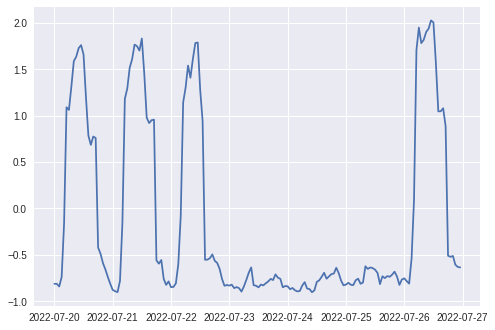

In [62]:
plt.style.use('seaborn')
plt.plot(ventanas_CPS_Getafe[0]["Consumo"])
plt.show()

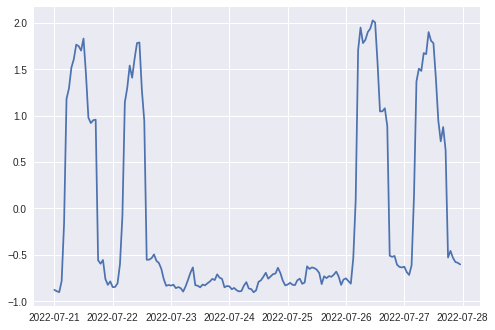

In [63]:
plt.style.use('seaborn')
plt.plot(ventanas_CPS_Getafe[1]["Consumo"])
plt.show()

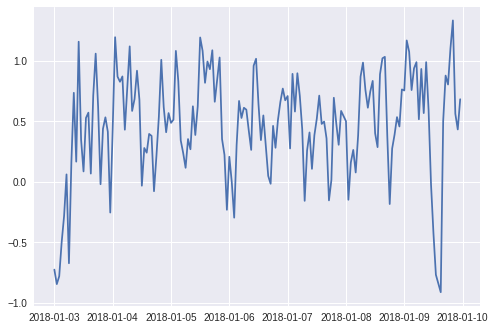

In [64]:
plt.style.use('seaborn')
plt.plot(ventanas_Fortia[1]["Consumo"])
plt.show()

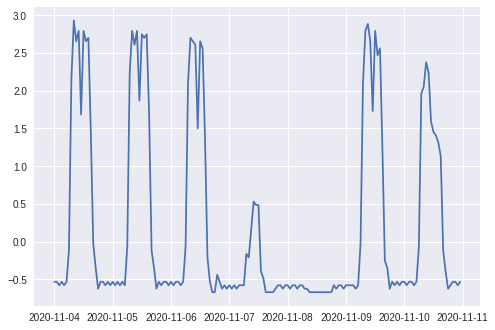

In [65]:
plt.style.use('seaborn')
plt.plot(ventanas_Hormiembro[1]["Consumo"])
plt.show()

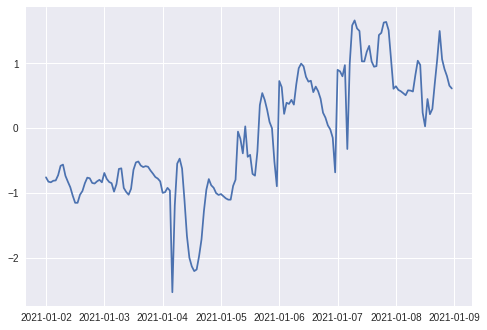

In [66]:
plt.style.use('seaborn')
plt.plot(ventanas_hospital_2[1]["Consumo"])
plt.show()

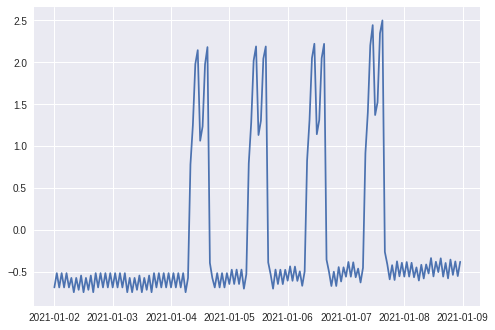

In [67]:
plt.style.use('seaborn')
plt.plot(ventanas_industria_1[1]["Consumo"])
plt.show()

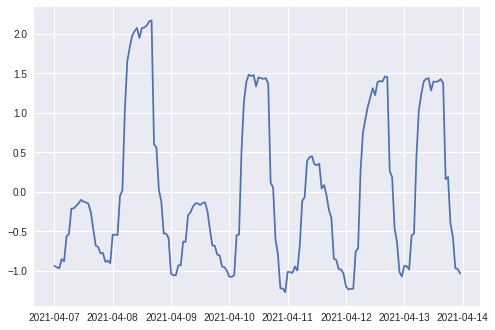

In [68]:
plt.style.use('seaborn')
plt.plot(ventanas_hospital_3[96]["Consumo"])
plt.show()

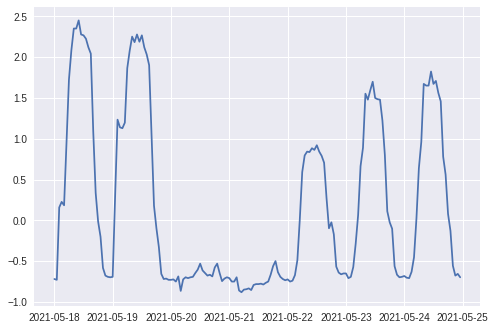

In [69]:
plt.style.use('seaborn')
plt.plot(ventanas_oficina_2[137]["Consumo"])
plt.show()

In [70]:
len_getafe = len(ventanas_CPS_Getafe)
print(len_getafe)
len_leganes = len(ventanas_CPS_Leganes)
print(len_leganes)
len_fortia = len(ventanas_Fortia)
print(len_fortia)
len_hormiembro = len(ventanas_Hormiembro)
print(len_hormiembro)

len_hospital_1 = len(ventanas_hospital_1)
print(len_hospital_1)
len_hospital_2 = len(ventanas_hospital_2)
print(len_hospital_2)
len_hospital_3 = len(ventanas_hospital_3)
print(len_hospital_3)
len_hotel_1 = len(ventanas_hotel_1)
print(len_hotel_1)
len_industria_1 = len(ventanas_industria_1)
print(len_industria_1)
len_industria_2 = len(ventanas_industria_2)
print(len_industria_2)
len_industria_3 = len(ventanas_industria_3)
print(len_industria_3)
len_industria_4 = len(ventanas_industria_4)
print(len_industria_4)
len_supermercado_1 = len(ventanas_supermercado_1)
print(len_supermercado_1)
len_supermercado_2 = len(ventanas_supermercado_2)
print(len_supermercado_2)
len_almacen_industrial = len(ventanas_almacen_industrial)
print(len_almacen_industrial)
len_industria_coninua = len(ventanas_industria_continua)
print(len_industria_coninua)
len_industria_farma = len(ventanas_industria_farma)
print(len_industria_farma)
len_oficina_1 = len(ventanas_oficina_1)
print(len_oficina_1)
len_oficina_2 = len(ventanas_oficina_2)
print(len_oficina_2)
len_oficina_3 = len(ventanas_oficina_3)
print(len_oficina_3)
len_industria_plastica = len(ventanas_industria_plastica)
print(len_industria_plastica)
len_industria_alimentacion = len(ventanas_industria_alimentacion)
print(len_industria_alimentacion)

16
685
1655
706
359
359
359
359
359
359
359
359
359
359
359
359
359
359
359
359
359
359


In [197]:
ventanas_industria_continua[0]

,Consumo,hora_sin,hora_cos,mes_sin,mes_cos,Cambio
Fecha,,,,,,
2021-01-01 00:00:00,0.968,0.000,1.000,0.500,0.866,0.000
2021-01-01 01:00:00,0.973,0.259,0.966,0.500,0.866,0.005
2021-01-01 02:00:00,1.012,0.500,0.866,0.500,0.866,0.039
2021-01-01 03:00:00,0.958,0.707,0.707,0.500,0.866,-0.054
2021-01-01 04:00:00,0.919,0.866,0.500,0.500,0.866,-0.039
2021-01-01 05:00:00,0.919,0.966,0.259,0.500,0.866,0.000
2021-01-01 06:00:00,0.943,1.000,0.000,0.500,0.866,0.025
2021-01-01 07:00:00,1.022,0.966,-0.259,0.500,0.866,0.078
2021-01-01 08:00:00,1.007,0.866,-0.500,0.500,0.866,-0.015


### Añadimos labels y separamos en Train y Test

In [72]:
# Añadimos labels

# Oficinas  = 0
ventanas_CPS_Getafe_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(0, num_classes=7)] for x in ventanas_CPS_Getafe]
ventanas_CPS_Leganes_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(0, num_classes=7)] for x in ventanas_CPS_Leganes]
ventanas_Hormiembro_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(0, num_classes=7)] for x in ventanas_Hormiembro]

ventanas_oficina_1_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(0, num_classes=7)] for x in ventanas_oficina_1]
ventanas_oficina_2_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(0, num_classes=7)] for x in ventanas_oficina_2]
ventanas_oficina_3_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(0, num_classes=7)] for x in ventanas_oficina_3]

oficinas_train = ventanas_CPS_Getafe_con_target  + ventanas_Hormiembro_con_target + ventanas_oficina_1_con_target +ventanas_oficina_3_con_target
random.shuffle(oficinas_train)

oficinas_test = ventanas_oficina_2_con_target + ventanas_CPS_Leganes_con_target
random.shuffle(oficinas_test)

# Fabrica discontinua= 1
ventanas_industria_1_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(1, num_classes=7)] for x in ventanas_industria_1]
ventanas_industria_2_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(1, num_classes=7)] for x in ventanas_industria_2]
ventanas_industria_3_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(1, num_classes=7)] for x in ventanas_industria_3]
ventanas_industria_4_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(1, num_classes=7)] for x in ventanas_industria_4]
ventanas_industria_farma_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(1, num_classes=7)] for x in ventanas_industria_farma]
ventanas_industria_plastica_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(1, num_classes=7)] for x in ventanas_industria_plastica]
ventanas_industria_alimentacion_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(1, num_classes=7)] for x in ventanas_industria_alimentacion]

industria_discontinua_train = ventanas_industria_1_con_target + ventanas_industria_2_con_target + ventanas_industria_3_con_target + ventanas_industria_plastica_con_target + ventanas_industria_alimentacion_con_target
random.shuffle(industria_discontinua_train)

industria_discontinua_test =  ventanas_industria_4_con_target + ventanas_industria_farma_con_target 
random.shuffle(industria_discontinua_test)

# Hospitales = 2
ventanas_hospital_1_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(2, num_classes=7)] for x in ventanas_hospital_1]
ventanas_hospital_2_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(2, num_classes=7)] for x in ventanas_hospital_2]
ventanas_hospital_3_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(2, num_classes=7)] for x in ventanas_hospital_3]

hospital_train = ventanas_hospital_1_con_target # + ventanas_hospital_2_con_target
random.shuffle(hospital_train)

hospital_test = ventanas_hospital_2_con_target #ventanas_hospital_3_con_target
random.shuffle(hospital_test)

# Hotel = 3
ventanas_hotel_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(3, num_classes=7)] for x in ventanas_hotel_1]

hotel_train = ventanas_hotel_con_target[0:170]
random.shuffle(hotel_train)

hotel_test = ventanas_hotel_con_target[170:]
random.shuffle(hotel_test)

# Supermercado = 4
ventanas_supermercado_1_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(4, num_classes=7)] for x in ventanas_supermercado_1]
ventanas_supermercado_2_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(4, num_classes=7)] for x in ventanas_supermercado_2]

supermercado_train = ventanas_supermercado_1_con_target
random.shuffle(supermercado_train)

supermercado_test = ventanas_supermercado_2_con_target
random.shuffle(supermercado_test)

# Almacen = 5
ventanas_almacen_industrial_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(5, num_classes=7)] for x in ventanas_almacen_industrial]

almacen_industrial_train = ventanas_almacen_industrial_con_target[0:170]
random.shuffle(almacen_industrial_train)

almacen_industrial_test = ventanas_almacen_industrial_con_target[170:]
random.shuffle(almacen_industrial_test)

# Industria continua = 6
ventanas_industria_continua_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(6, num_classes=7)] for x in ventanas_industria_continua]
ventanas_Fortia_con_target = [[x.to_numpy().reshape(-1), tf.keras.utils.to_categorical(6, num_classes=7)] for x in ventanas_Fortia]

industria_continua_train = ventanas_industria_continua_con_target
random.shuffle(industria_continua_train)

industria_continua_test = ventanas_Fortia_con_target
random.shuffle(industria_continua_test)

In [73]:
# Seleccionamos Train dos oficinas distintas que suman 60% de los datos de oficina y la misma cantidad de filas de la farica Fortia
train = oficinas_train[0:170] + industria_discontinua_train[0:170] + hospital_train[0:170] + hotel_train[0:170] + supermercado_train[0:170] + almacen_industrial_train[0:170] + industria_continua_train[0:170]
test = oficinas_test[0:170] + industria_discontinua_test[0:170] + hospital_test[0:170] + hotel_test[0:170] + supermercado_test[0:170] + almacen_industrial_test[0:170] + industria_continua_test[0:170]

random.shuffle(train)
X_train =  np.stack([x[0] for x in train], axis=0)
y_train = np.array([x[1] for x in train])

random.shuffle(test)
X_test = np.stack([x[0] for x in test], axis=0)
y_test = np.array([x[1] for x in test])

In [74]:
print(sum(y_train))
print(len(y_train))

print(sum(y_test))
print(len(y_test))

[170. 170. 170. 170. 170. 170. 170.]
1190
[170. 170. 170. 170. 170. 170. 170.]
1190


In [75]:
X_test.shape

(1190, 1008)

In [76]:
y_test.shape

(1190, 7)

### Pruebas modelos

In [77]:
#rf_params = {"max_depth": [3, 5, 8],
#             "max_features": [8, 15, 25],
#             "n_estimators": [50, 100, 200],
#             "min_samples_split": [2, 5, 10]}
#rf = RandomForestClassifier(random_state=357)
#gs_cv_rf = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
#rf_tuned = RandomForestClassifier(**gs_cv_rf.best_params_, random_state=357).fit(X_train, y_train)

In [78]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1008,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(7, activation='sigmoid'))

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

ReduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.7, patience=3, min_lr=0.0001)

In [79]:
a = model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                32288     
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 7)                 63        
                                                                 
Total params: 32,615
Trainable params: 32,615
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(X_train, y_train, batch_size=16, epochs=5, validation_data=(X_test, y_test), callbacks=[ReduceLR])

Epoch 1/5
75/75 [==============================] - 3s 8ms/step - loss: 1.4045 - categorical_accuracy: 0.4840 - val_loss: 1.4963 - val_categorical_accuracy: 0.4933 - lr: 0.0010
Epoch 2/5
75/75 [==============================] - 0s 5ms/step - loss: 0.6615 - categorical_accuracy: 0.7546 - val_loss: 1.0443 - val_categorical_accuracy: 0.6202 - lr: 0.0010
Epoch 3/5
75/75 [==============================] - 0s 5ms/step - loss: 0.4805 - categorical_accuracy: 0.8202 - val_loss: 1.0962 - val_categorical_accuracy: 0.5739 - lr: 0.0010
Epoch 4/5
75/75 [==============================] - 0s 4ms/step - loss: 0.4020 - categorical_accuracy: 0.8563 - val_loss: 1.1348 - val_categorical_accuracy: 0.5807 - lr: 0.0010
Epoch 5/5
75/75 [==============================] - 0s 5ms/step - loss: 0.3213 - categorical_accuracy: 0.8672 - val_loss: 1.3646 - val_categorical_accuracy: 0.6084 - lr: 0.0010


In [84]:
model.save('/home/inaki.campo/Brain_Clasificador/default_classifier.keras')

In [88]:
m = tf.keras.models.load_model('/home/inaki.campo/Brain_Clasificador/default_classifier.keras')

In [203]:
y_pred = model(X_test)

In [204]:
matrix = pd.crosstab(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [205]:
matrix
# Oficinas  = 0
# Fabrica discontinua= 1
# Hospitales = 2
# Hotel = 3
# Supermercado = 4
# Almacen = 5
# Fabrica continua = 6

# Hotel(3) y Almacen(5) -> misma instalacion en Train y Test


# Escalar junto hospitales y oficinas
# Intentar meter de alguna forma la informacion de las escalas

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,133,0,20,0,17,0,0
1,0,81,0,0,0,89,0
2,0,0,96,17,3,0,54
3,0,0,0,170,0,0,0
4,0,1,169,0,0,0,0
5,0,90,0,0,0,80,0
6,0,0,61,0,0,0,109


In [56]:
svm_tuned = SVC().fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (1190, 7) instead.

In [57]:
lgr_tuned = LogisticRegression(random_state=357).fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (1190, 7) instead.

In [58]:
models = [("LGR", lgr_tuned),
          ("SVM", svm_tuned),
          #("RF", rf_tuned),
         ]

for name, model in models:
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    #recall = recall_score(y_test, y_pred)
    msg = "%s: (%f) (%f)" % (name, acc_train, acc_test)
    print(msg)

NameError: name 'lgr_tuned' is not defined